<a href="https://colab.research.google.com/github/Daniyal56/FaceRecogniton/blob/master/Men-vs-women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [2]:
files.upload()
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d playlist/men-women-classification

100% 1.19G/1.19G [00:11<00:00, 186MB/s]



In [4]:
!unzip men-women-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/women/00000261.jpg  
  inflating: data/women/00000262.jpg  
  inflating: data/women/00000263.jpg  
  inflating: data/women/00000264.jpg  
  inflating: data/women/00000265.jpg  
  inflating: data/women/00000266.jpg  
  inflating: data/women/00000267.jpg  
  inflating: data/women/00000268.jpg  
  inflating: data/women/00000269.jpg  
  inflating: data/women/00000270.jpg  
  inflating: data/women/00000271.jpg  
  inflating: data/women/00000272.jpg  
  inflating: data/women/00000273.jpg  
  inflating: data/women/00000274.jpg  
  inflating: data/women/00000275.jpg  
  inflating: data/women/00000276.JPG  
  inflating: data/women/00000277.jpg  
  inflating: data/women/00000279.jpg  
  inflating: data/women/00000280.png  
  inflating: data/women/00000281.jpg  
  inflating: data/women/00000282.jpg  
  inflating: data/women/00000283.jpg  
  inflating: data/women/00000285.jpg  
  inflating: data/women/00000286.jpg  
  inflating: 

In [0]:
!mkdir test

In [0]:
!mv /content/men /content/test

In [0]:
!mv /content/women /content/test

In [0]:
train_dir = '/content/data'
test_dir = '/content/test'

In [0]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [14]:
img = image.load_img(path='/content/data/men/00000001.jpg',target_size=(150,150))
img = image.img_to_array(img)
img.shape

(150, 150, 3)

In [15]:
x = img.reshape((1,)+img.shape)
x.shape

(1, 150, 150, 3)

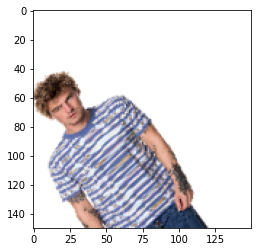

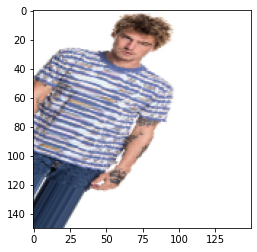

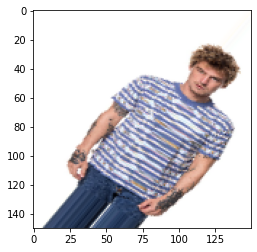

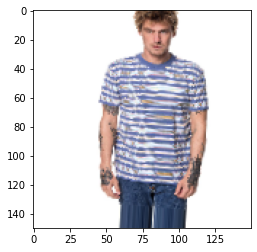

In [17]:
i = 0
for batch in train_datagen.flow(x,batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 3309 images belonging to 2 classes.
Found 3309 images belonging to 2 classes.


In [0]:
model = tensorflow.keras.models.Sequential([tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dropout(0.5),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1,activation='sigmoid')
                                            
])

In [0]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])


In [23]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=val_generator,validation_steps=50)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 153s 2s/step - loss: 0.6749 - acc: 0.5815 - val_loss: 0.6619 - val_acc: 0.5590
Epoch 2/100
100/100 [==============================] - 154s 2s/step - loss: 0.6598 - acc: 0.6053 - val_loss: 0.6364 - val_acc: 0.6510
Epoch 3/100
100/100 [==============================] - 156s 2s/step - loss: 0.6490 - acc: 0.6285 - val_loss: 0.6297 - val_acc: 0.6620
Epoch 4/100
100/100 [==============================] - 153s 2s/step - loss: 0.6410 - acc: 0.6415 - val_loss: 0.6193 - val_acc: 0.6540
Epoch 5/100
100/100 [==============================] - 155s 2s/step - loss: 0.6389 - acc: 0.6445 - val_loss: 0.6508 - val_acc: 0.6120
Epoch 6/100
100/100 [==============================] - 151s 2s/step - loss: 0.6295 - acc: 0.6556 - val_loss: 0.6299 - val_acc: 0.6560
Epoch 7/100
100/100 [==============================] - 157s 2s/step - loss: 0.6246 - acc: 0.6516 - val_loss: 0.6213 - va

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1,len(acc) + 1)

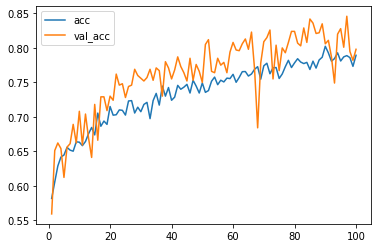

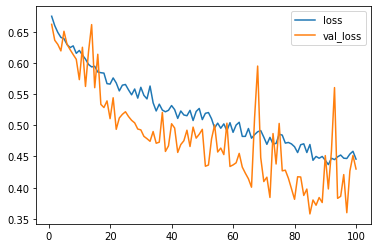

In [27]:
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
model.save('men-vs-women-without-pretrained-model.h5')